Broadcasting of Arrays

Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

Rule 1
If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

Rule 2
If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

Rule 3
If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [83]:
import numpy as np

In [84]:
# Example 1
M = np.ones((2, 3))
print(M.shape)
print(M)

(2, 3)
[[1. 1. 1.]
 [1. 1. 1.]]


In [85]:
a = np.arange(3)
print(a.shape)
print(a)

(3,)
[0 1 2]


Let’s consider an operation on these two arrays, which have the following shapes:

M.shape is (2, 3)

a.shape is (3,)

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

M.shape remains (2, 3)

a.shape becomes (1, 3)

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

M.shape remains (2, 3)

a.shape becomes (2, 3)

The shapes now match, and we see that the final shape will be (2, 3):

In [87]:
print(M+a)

[[1. 2. 3.]
 [1. 2. 3.]]


In [88]:
# Example 2
a = np.arange(3).reshape((3, 1))
print(a.shape)
print(a)

(3, 1)
[[0]
 [1]
 [2]]


In [89]:
b = np.arange(3)
print(b.shape)
print(b)

(3,)
[0 1 2]


Again, we’ll start by determining the shapes of the arrays:

a.shape is (3, 1)

b.shape is (3,)

Rule 1 says we must pad the shape of b with ones:

a.shape remains (3, 1)

b.shape becomes (1, 3)

And rule 2 tells us that we must upgrade each of these 1s to match the corresponding size of the other array:

a.shape becomes (3, 3)

b.shape becomes (3, 3)

Because the results match, these shapes are compatible. We can see this here:

In [91]:
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [92]:
# Example 3
M = np.ones((3,2))
print(M.shape)
print(M)

(3, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [93]:
a = np.arange(3)
print(a.shape)
print(a)

(3,)
[0 1 2]


This is just a slightly different situation than in the first example: the matrix M is transposed. How does this affect the calculation? The shapes of the arrays are as follows:

M.shape is (3, 2)

a.shape is (3,)

Again, rule 1 tells us that we must pad the shape of a with ones:

M.shape remains (3, 2)

a.shape becomes (1, 3)

By rule 2, the first dimension of a is then stretched to match that of M:

M.shape remains (3, 2)

a.shape becomes (3, 3)

Now we hit rule 3—the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [95]:
# print(M+a)

In [96]:
rng = np.random.default_rng(1701)
X = rng.random((10, 3))
print(X.shape)
print(X)

(10, 3)
[[0.4020733  0.30563311 0.67668051]
 [0.15821208 0.79247763 0.09419469]
 [0.36753944 0.06388928 0.96431608]
 [0.35200998 0.54550343 0.88597945]
 [0.57016965 0.26614394 0.8170382 ]
 [0.55906652 0.06387035 0.84877751]
 [0.89414484 0.18920785 0.23660015]
 [0.16502896 0.56583856 0.29513111]
 [0.29078012 0.90079544 0.59992434]
 [0.09133896 0.00578466 0.97096222]]


In [97]:
Xmean = X.mean(axis=0)
print(Xmean.shape)
print(Xmean)

(3,)
[0.38503638 0.36991443 0.63896043]


In [98]:
Xcentered = X-Xmean
print(Xcentered.shape)
print(Xcentered)

(10, 3)
[[ 0.01703691 -0.06428131  0.03772009]
 [-0.2268243   0.4225632  -0.54476574]
 [-0.01749695 -0.30602514  0.32535566]
 [-0.0330264   0.175589    0.24701902]
 [ 0.18513326 -0.10377048  0.17807777]
 [ 0.17403013 -0.30604408  0.20981709]
 [ 0.50910846 -0.18070657 -0.40236028]
 [-0.22000743  0.19592414 -0.34382932]
 [-0.09425626  0.53088102 -0.03903608]
 [-0.29369742 -0.36412976  0.33200179]]


In [99]:
print(Xcentered.mean(axis=0))

[ 4.99600361e-17 -4.44089210e-17  0.00000000e+00]


Comparison Operators As UFuncs

In [101]:
x = np.array([1, 2, 3, 4, 5])

In [102]:
x < 3

array([ True,  True, False, False, False])

In [103]:
x > 3

array([False, False, False,  True,  True])

In [104]:
x == 3

array([False, False,  True, False, False])

In [105]:
x != 3

array([ True,  True, False,  True,  True])

In [106]:
x <= 3

array([ True,  True,  True, False, False])

In [107]:
x >= 3

array([False, False,  True,  True,  True])

In [108]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3,4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [109]:
x < 6

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

Counting entries

In [111]:
np.count_nonzero(x < 6)

8

Summing entries

In [113]:
np.sum(x < 6)

8

Summing along an axis

In [115]:
# Column-wise sums
np.sum(x < 6, axis=0)

array([1, 1, 3, 3])

In [116]:
# Row-wise sums
np.sum(x < 6, axis=1)

array([3, 2, 3])

Any and All

In [118]:
np.any(x > 8)

True

In [119]:
np.all(x < 8)

False

Any and All have flavors that check along a particular axis

Bitwise Logical Operators

In [122]:
(x < 8) & (x > 3)

array([[False,  True, False, False],
       [False,  True, False, False],
       [False,  True,  True, False]])

In [123]:
(x < 6) | (x > 2)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

So, remember this: and and or perform a single Boolean evaluation on an entire object, while & and | perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.

In [125]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)
x

array([ 0.43874206,  0.32818515,  0.68328838, -0.81928256,  0.69156442,
       -1.62453268,  1.50806312, -1.22449846,  1.22696072, -1.05013046,
        0.62509363,  0.09693023,  0.62776415, -0.28565182,  1.49678665,
       -0.76768541, -0.3942867 , -1.35693505,  0.33524959,  0.57442768,
        1.62016911,  0.33395176, -1.02906713, -0.94266623,  0.38365532,
        0.25423793,  1.36108696,  1.25474959, -0.05637126,  0.44880896,
       -1.47909513,  2.40254455, -0.06959272, -1.52752832,  1.93633419,
       -1.28006351, -0.71562065,  0.72455605,  0.47362789, -0.33131697,
        0.26272942,  1.75038031,  0.01834221, -1.43899931,  1.3716487 ,
        0.67679557,  0.53793618,  1.53399445,  0.28214872,  0.56313954,
       -0.37793941, -1.15832253,  0.96594187, -0.35611958, -1.28536874,
        0.19742658,  0.41682623, -0.95386364,  0.75830441, -2.08596882,
       -1.16203473,  0.34232684, -1.11888193, -1.13596   ,  0.6742499 ,
        1.26767704,  0.65873509, -0.64003051,  3.09160717,  0.51

In [126]:
bins = np.linspace(-5, 5, 20)
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [127]:
counts = np.zeros_like(bins)
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [163]:
i = np.searchsorted(bins, x)
i

array([11, 11, 11,  8, 11,  7, 13,  8, 12,  8, 11, 10, 11,  9, 13,  9,  9,
        7, 11, 11, 13, 11,  8,  8, 11, 10, 13, 12, 10, 11,  7, 15, 10,  7,
       14,  8,  9, 11, 11,  9, 10, 13, 10,  7, 13, 11, 11, 13, 11, 11,  9,
        8, 12,  9,  8, 10, 11,  8, 11,  6,  8, 11,  8,  8, 11, 12, 11,  9,
       16, 11, 11, 10, 11, 11, 13, 10,  7,  8, 11, 11,  7,  9,  9, 11, 12,
        9, 11, 12, 14,  9, 11, 12, 10,  8, 10, 10,  9, 11,  8, 15])

In [165]:
np.add.at(counts, i, 1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 15., 13., 12., 32.,  7.,
        8.,  2.,  2.,  1.,  0.,  0.,  0.])

In [191]:
X = rng.random((10, 2))
X.shape

(10, 2)

In [193]:
X

array([[0.30996984, 0.86755384],
       [0.76241512, 0.12267775],
       [0.87240934, 0.97672732],
       [0.76392583, 0.54179612],
       [0.76337955, 0.64238766],
       [0.28724588, 0.49168101],
       [0.8376644 , 0.65340984],
       [0.65732383, 0.32957476],
       [0.53500267, 0.50540463],
       [0.78077789, 0.39624012]])

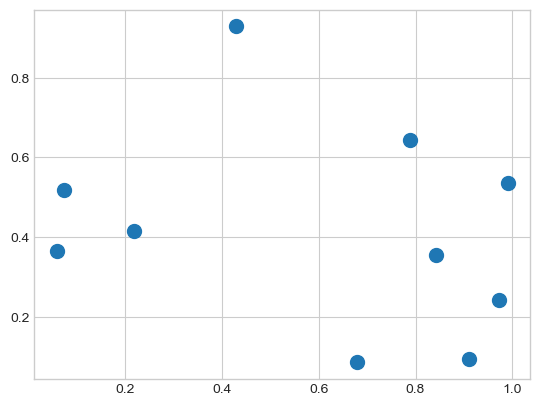

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(X[:, 0], X[:, 1], s=100)

In [187]:
Y = X[:, np.newaxis]
Y.shape

(10, 1, 2)

In [189]:
Y

array([[[0.4286929 , 0.92886887]],

       [[0.78764941, 0.64390348]],

       [[0.99056718, 0.53427892]],

       [[0.90956002, 0.09409217]],

       [[0.21853192, 0.41448441]],

       [[0.05831073, 0.36406978]],

       [[0.67953465, 0.08523745]],

       [[0.07310691, 0.51768392]],

       [[0.84329503, 0.35390371]],

       [[0.97353984, 0.24078689]]])

In [185]:
Z = X[np.newaxis, :]
Z.shape

(1, 10, 2)

In [195]:
Z

array([[[0.4286929 , 0.92886887],
        [0.78764941, 0.64390348],
        [0.99056718, 0.53427892],
        [0.90956002, 0.09409217],
        [0.21853192, 0.41448441],
        [0.05831073, 0.36406978],
        [0.67953465, 0.08523745],
        [0.07310691, 0.51768392],
        [0.84329503, 0.35390371],
        [0.97353984, 0.24078689]]])

In [197]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [199]:
differences

array([[[ 0.00000000e+00,  0.00000000e+00],
        [-4.52445283e-01,  7.44876089e-01],
        [-5.62439505e-01, -1.09173483e-01],
        [-4.53955996e-01,  3.25757717e-01],
        [-4.53409717e-01,  2.25166183e-01],
        [ 2.27239569e-02,  3.75872831e-01],
        [-5.27694562e-01,  2.14144001e-01],
        [-3.47353997e-01,  5.37979085e-01],
        [-2.25032835e-01,  3.62149214e-01],
        [-4.70808056e-01,  4.71313720e-01]],

       [[ 4.52445283e-01, -7.44876089e-01],
        [ 0.00000000e+00,  0.00000000e+00],
        [-1.09994222e-01, -8.54049572e-01],
        [-1.51071285e-03, -4.19118372e-01],
        [-9.64434577e-04, -5.19709906e-01],
        [ 4.75169240e-01, -3.69003259e-01],
        [-7.52492795e-02, -5.30732089e-01],
        [ 1.05091286e-01, -2.06897005e-01],
        [ 2.27412448e-01, -3.82726876e-01],
        [-1.83627727e-02, -2.73562369e-01]],

       [[ 5.62439505e-01,  1.09173483e-01],
        [ 1.09994222e-01,  8.54049572e-01],
        [ 0.00000000e+00,  0

In [201]:
differences_sqd = differences ** 2
differences_sqd

array([[[0.00000000e+00, 0.00000000e+00],
        [2.04706734e-01, 5.54840388e-01],
        [3.16338197e-01, 1.19188493e-02],
        [2.06076046e-01, 1.06118090e-01],
        [2.05580372e-01, 5.06998101e-02],
        [5.16378218e-04, 1.41280385e-01],
        [2.78461551e-01, 4.58576530e-02],
        [1.20654799e-01, 2.89421495e-01],
        [5.06397768e-02, 1.31152053e-01],
        [2.21660225e-01, 2.22136623e-01]],

       [[2.04706734e-01, 5.54840388e-01],
        [0.00000000e+00, 0.00000000e+00],
        [1.20987289e-02, 7.29400671e-01],
        [2.28225332e-06, 1.75660210e-01],
        [9.30134054e-07, 2.70098386e-01],
        [2.25785806e-01, 1.36163405e-01],
        [5.66245407e-03, 2.81676550e-01],
        [1.10441783e-02, 4.28063706e-02],
        [5.17164214e-02, 1.46479861e-01],
        [3.37191421e-04, 7.48363699e-02]],

       [[3.16338197e-01, 1.19188493e-02],
        [1.20987289e-02, 7.29400671e-01],
        [0.00000000e+00, 0.00000000e+00],
        [1.17686717e-02, 1.891

In [205]:
dist_sqd = np.sum(differences_sqd, axis=-1)
dist_sqd.shape

(10, 10)

In [207]:
dist_sqd

array([[0.        , 0.75954712, 0.32825705, 0.31219414, 0.25628018,
        0.14179676, 0.3243192 , 0.41007629, 0.18179183, 0.44379685],
       [0.75954712, 0.        , 0.7414994 , 0.17566249, 0.27009932,
        0.36194921, 0.287339  , 0.05385055, 0.19819628, 0.07517356],
       [0.32825705, 0.7414994 , 0.        , 0.20093382, 0.12367051,
        0.5776862 , 0.10574141, 0.46506822, 0.33598834, 0.34536171],
       [0.31219414, 0.17566249, 0.20093382, 0.        , 0.01011896,
        0.2297353 , 0.017895  , 0.05640189, 0.05373015, 0.02147054],
       [0.25628018, 0.27009932, 0.12367051, 0.01011896, 0.        ,
        0.24941577, 0.00563973, 0.10909973, 0.07092035, 0.06089131],
       [0.14179676, 0.36194921, 0.5776862 , 0.2297353 , 0.24941577,
        0.        , 0.32911676, 0.16323613, 0.06157177, 0.25268281],
       [0.3243192 , 0.287339  , 0.10574141, 0.017895  , 0.00563973,
        0.32911676, 0.        , 0.13739188, 0.11350966, 0.06937234],
       [0.41007629, 0.05385055, 0.4650682